
# 05. Redes neuronales en Keras
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)


In [6]:

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.17.0


## 5.1. Precarga de los datos en Keras

In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

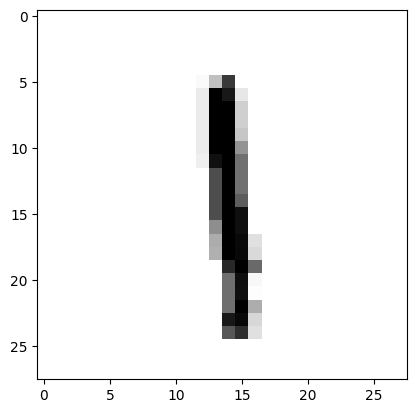

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)



In [9]:
print(y_train[8])

1


In [10]:
print(x_train.ndim)

3


In [11]:
print(x_train.shape)

(60000, 28, 28)


In [12]:
print(x_train.dtype) 

uint8


In [13]:
my_slice = x_train [1:100:,:]
print(my_slice.shape)

(99, 28, 28)


In [14]:
my_slice = x_train [1:100,0:28, 0:28]
print(my_slice.shape)

(99, 28, 28)


In [15]:
my_slice = x_train [:, 14:, 14:]
print(my_slice.shape)

(60000, 14, 14)


In [16]:
my_slice = x_train [:, 7:-7, 7:-7]
print(my_slice.shape)


(60000, 14, 14)


## 5.2. Preprocesado de datos de entrada en una red neuronal

In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [18]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [19]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [63]:
from tensorflow.keras.utils import to_categorical


In [21]:
print(y_test[0])

7


In [22]:
print(y_train[0])

5


In [23]:
print(y_train.shape)

(60000,)


In [24]:
print(x_test.shape)

(10000, 784)


In [25]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print(y_test[0])


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [26]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [27]:
print(y_train.shape)

(60000, 10)


In [28]:
print(y_test.shape)

(10000, 10)


## 5.3. Definición del modelo

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

c:\Users\Hackkill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

## 5.4. Configuración del proceso de aprendizaje

In [31]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])


## 5.5. Entrenamiento del modelo

In [32]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.3921 - loss: 2.0772
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.7271 - loss: 1.3830
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.7903 - loss: 1.0050
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.8243 - loss: 0.8052
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.8417 - loss: 0.6831


## 5.6. Evaluación del modelo

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.8366 - loss: 0.6575


In [34]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8565999865531921


In [35]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


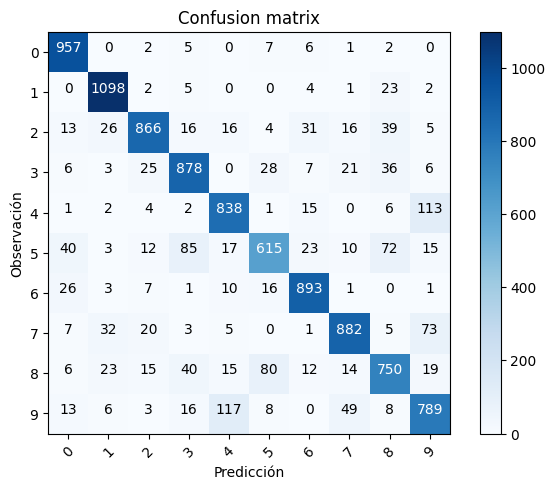

In [36]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## 5.7. Generación de predicciones

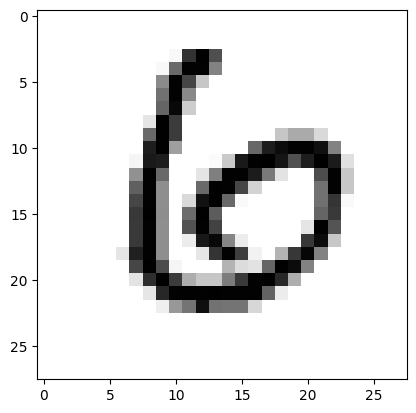

In [37]:
x_test_old = x_test.reshape(10000, 28,28)
plt.imshow(x_test_old[11], cmap=plt.cm.binary)

In [38]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step


In [39]:
np.argmax(predictions[11])

6

In [40]:
print(predictions[11])

[0.09685786 0.04945184 0.17790405 0.01701878 0.04336258 0.06602558
 0.471401   0.0058106  0.06163685 0.01053085]


In [41]:
np.sum(predictions[11])

1.0

## 5.8. Datos Fashion-MNIST

In [42]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [44]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0


In [45]:
print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [46]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

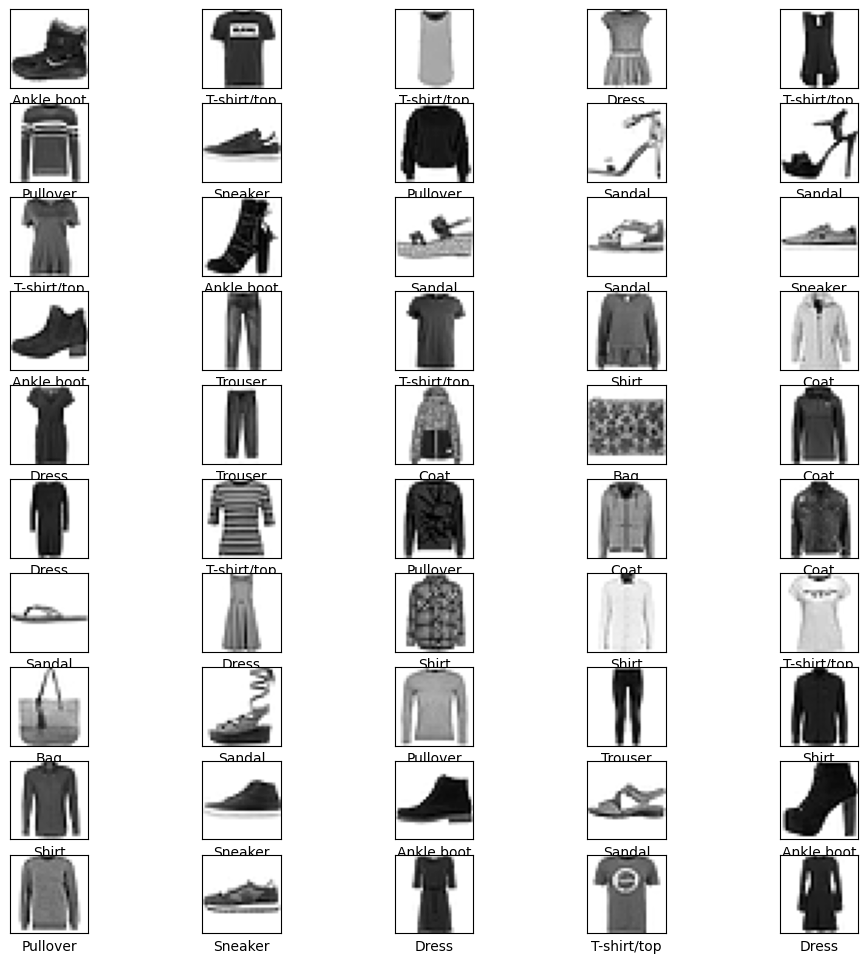

In [47]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [64]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))


In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.3414 - loss: 2.0063
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.6623 - loss: 1.3166
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.7094 - loss: 1.0322
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.7344 - loss: 0.8805
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - accuracy: 0.7535 - loss: 0.7839


In [52]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.7596 - loss: 0.7453


In [53]:
print('Test accuracy:', test_acc)

Test accuracy: 0.7598000168800354


In [54]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step


In [55]:
predictions[5]

array([1.25025623e-02, 8.44527245e-01, 1.36070745e-02, 7.58194029e-02,
       3.20449620e-02, 2.84755812e-03, 1.36904307e-02, 3.56374099e-03,
       4.20561206e-04, 9.76481766e-04], dtype=float32)

In [56]:
np.argmax(predictions[5])

1

In [57]:
test_labels[5]

1

In [58]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

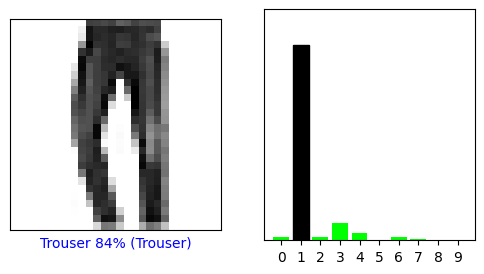

In [59]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

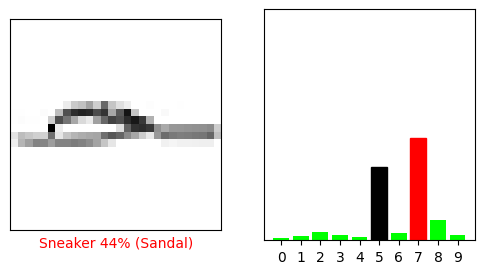

In [60]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

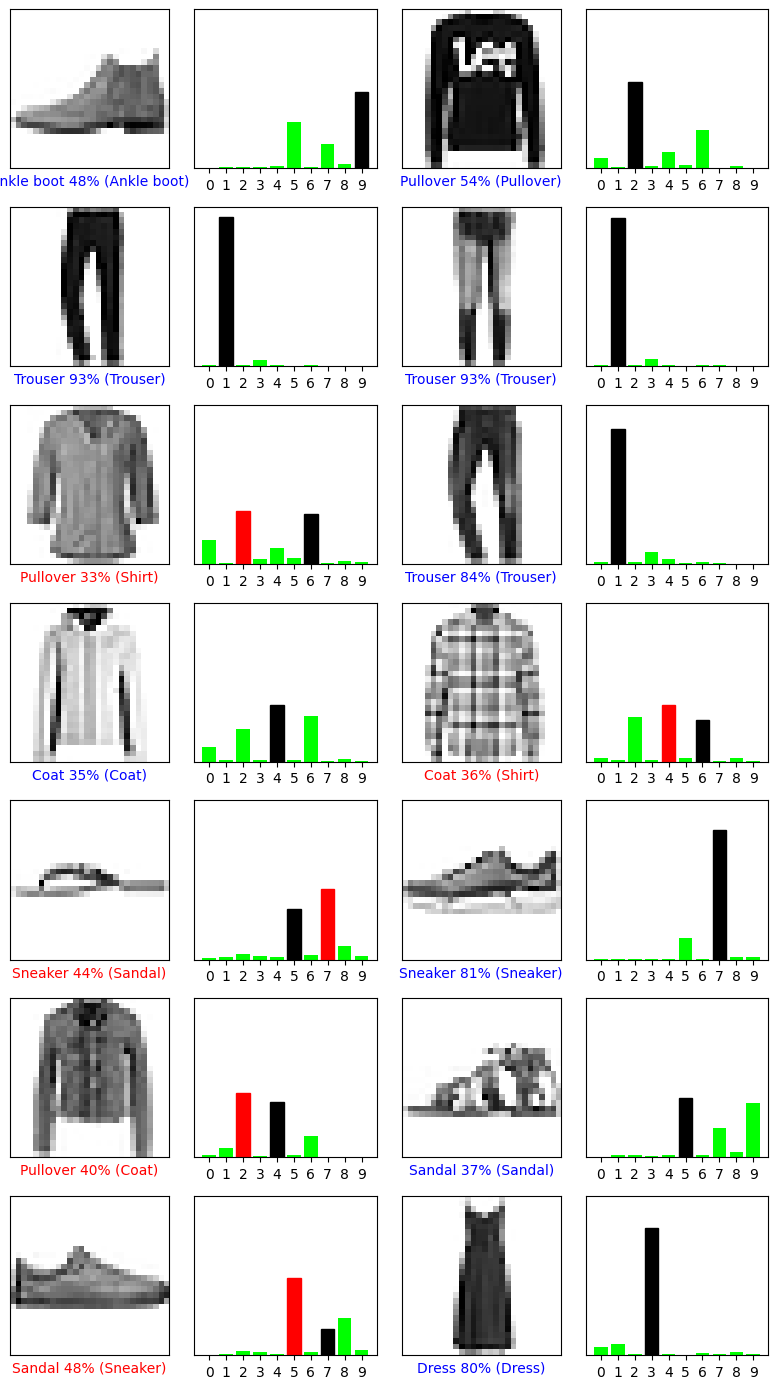

In [61]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [62]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.6064 - loss: 1.3763
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.8046 - loss: 0.6067
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.8322 - loss: 0.4963
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.8448 - loss: 0.4524
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.8489 - loss: 0.4369
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.8393 - loss: 0.4528

Test accuracy: 0.8364999890327454


## Pruebas para mejorar el test Accuracy

In [68]:
#probamos con más capas sin saturarlo y más epochs
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='sigmoid'))
model2.add(Dense(64, activation='sigmoid')) 
model2.add(Dense(10, activation='softmax'))


model2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=25)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7137 - loss: 0.9107
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8558 - loss: 0.4003
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8725 - loss: 0.3520
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8820 - loss: 0.3243
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8880 - loss: 0.3058
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8931 - loss: 0.2918
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8976 - loss: 0.2792
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9009 - loss: 0.2672
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9054 - loss: 0.2565
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9082 - loss: 0.2459
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9107 - loss: 0.2389
Epoch 12/25
1875/1875 ━━━━━━━━

In [70]:
#probamos con otra funcion, en vez de sigmoid usaremos Rectified Linear Unit (relu) y más epochs
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu')) 
model2.add(Dense(10, activation='softmax'))


model2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=25)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7787 - loss: 0.6339
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8648 - loss: 0.3748
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8745 - loss: 0.3374
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8856 - loss: 0.3072
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8875 - loss: 0.3017
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8934 - loss: 0.2837
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9002 - loss: 0.2598
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9047 - loss: 0.2552
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9075 - loss: 0.2473
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9090 - loss: 0.2402
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9175 - loss: 0.2220
Epoch 12/25
1875/1875 ━━━━━━━━

In [72]:
#Relu a dado peor resultado, volvemos a sigmoide pero ajustando el tamño de lote
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='relu')) #sigmoid 0.87949
model2.add(Dense(64, activation='relu')) #relu 0.88709
model2.add(Dense(10, activation='softmax'))


model2.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=25, batch_size=32)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/25


c:\Users\Hackkill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7751 - loss: 0.6446
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8615 - loss: 0.3804
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8746 - loss: 0.3369
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8896 - loss: 0.3022
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8919 - loss: 0.2895
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9010 - loss: 0.2714
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8986 - loss: 0.2693
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9041 - loss: 0.2542
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9099 - loss: 0.2403
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9108 - loss: 0.2348
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9156 - loss: 0.2256
Epoch 12/25
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [73]:
#probamos otros optimizador diferente
from tensorflow.keras.optimizers import RMSprop
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='relu')) #sigmoid 0.87949
model2.add(Dense(64, activation='relu')) #relu 0.88709
model2.add(Dense(10, activation='softmax'))


model2.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=25, batch_size=32)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/25


c:\Users\Hackkill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7721 - loss: 0.6425
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8619 - loss: 0.3806
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8736 - loss: 0.3518
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8811 - loss: 0.3337
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8860 - loss: 0.3229
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8904 - loss: 0.3123
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8914 - loss: 0.3104
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8924 - loss: 0.3067
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8952 - loss: 0.2995
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8958 - loss: 0.2996
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9000 - loss: 0.2887
Epoch 12/25
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [74]:
#probamos con dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='relu')) #sigmoid 0.87949
model.add(Dropout(0.5))
model2.add(Dense(64, activation='relu')) #relu 0.88709
model.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))


model2.compile(optimizer=RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=25, batch_size=32)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

c:\Users\Hackkill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7714 - loss: 0.6486
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8607 - loss: 0.3875
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8744 - loss: 0.3485
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8800 - loss: 0.3385
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8846 - loss: 0.3262
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8855 - loss: 0.3196
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8888 - loss: 0.3116
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 0.3086
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8935 - loss: 0.3036
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8919 - loss: 0.3080
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8972 - loss: 0.2961
Epoch 12/25
1875/1875 ━━━━━━━━

In [75]:
#cambiamos el optimizador
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='relu')) #sigmoid 0.87949
model.add(Dropout(0.5))
model2.add(Dense(64, activation='relu')) #relu 0.88709
model.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))


model2.compile(optimizer=SGD(momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=25, batch_size=32)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/25


c:\Users\Hackkill\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7469 - loss: 0.7093
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8498 - loss: 0.4029
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8696 - loss: 0.3542
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8749 - loss: 0.3303
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8829 - loss: 0.3134
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8904 - loss: 0.2933
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8945 - loss: 0.2822
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9014 - loss: 0.2657
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9003 - loss: 0.2635
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9029 - loss: 0.2591
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9068 - loss: 0.2462
Epoch 12/25
1875/1875 ━━━━━━━━━━━━━━━━━━━

## Conclusion: lo máximo que se pudo obtener fue Test accuracy: 0.8919000029563904 y se obtuvo con el modelo inicial pero añadiendo un par de capas y aumentando el número de epochs!